<a href="https://colab.research.google.com/github/MORO-66t/Alphabet-Classification-Description/blob/main/DL_Projectv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# from google.colab import files
# files.upload()

In [5]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
data_dir = "/content/drive/My Drive/Deep_Learning_Project/Data"


In [7]:
import pandas as pd

test_data = pd.read_csv(data_dir + "/emnist-letters-train.csv")
train_data  = pd.read_csv(data_dir + "/emnist-letters-test.csv")


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix

In [9]:
# test_data = pd.read_csv(r"/content/emnist-letters-test.csv", header=None)
# train_data = pd.read_csv(r"/content/emnist-letters-train.csv", header=None)

In [10]:
column_names = ['label'] + [f'pixel_{i}' for i in range(784)]
train_data.columns = column_names
test_data.columns=column_names

In [11]:
train_data.head()

,label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
train_data.shape

(14799, 785)

In [13]:
test_data.shape

(88799, 785)

In [14]:
test_data.head()

,label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
def show_samples(X, y, classes=26, n=8):
    plt.figure(figsize=(12,3))
    for i in range(n):
        ax = plt.subplot(1, n, i+1)
        plt.imshow(X[i].squeeze(), cmap='gray')
        lbl = np.argmax(y[i]) if y is not None else None
        if lbl is not None:
            plt.title(chr(ord('A') + lbl))
        plt.axis('off')
    plt.show()

In [16]:
# Separate features and labels of training
X_train = train_data.drop('label', axis=1).values
y_train_raw = train_data['label'].values

print("Features shape:", X_train.shape)
print("Labels shape:", y_train_raw.shape)


Features shape: (14799, 784)
Labels shape: (14799,)


In [17]:
# Separate features and labels of testing
X_test = test_data.drop('label', axis=1).values
y_test_raw = test_data['label'].values

print("Features shape:", X_test.shape)
print("Labels shape:", y_test_raw.shape)


Features shape: (88799, 784)
Labels shape: (88799,)


In [18]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test  = X_test.reshape(-1, 28, 28, 1)

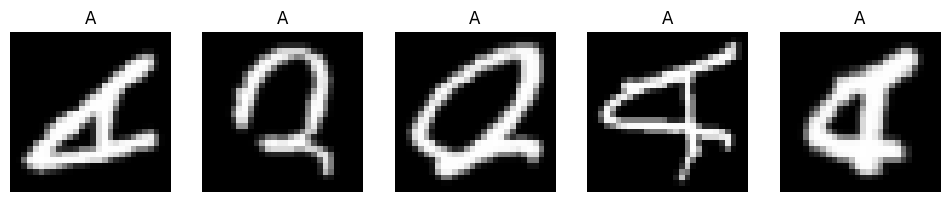

In [19]:
show_samples(X_train, y_train_raw, n=5)

In [20]:
# X_train = np.transpose(X_train, (0, 2, 1, 3))
# X_train = np.flip(X_train, axis=2)

# X_test = np.transpose(X_test, (0, 2, 1, 3))
# X_test = np.flip(X_test, axis=2)

In [21]:
X_train = np.rot90(X_train, k=1, axes=(1,2))
X_test  = np.rot90(X_test,  k=1, axes=(1,2))

In [22]:
X_train = X_train.astype('float32') / 255.0
X_test  = X_test.astype('float32') / 255.0

# One Hot Encoding

In [23]:
y_train = to_categorical(y_train_raw - 1, num_classes=26)
y_test  = to_categorical(y_test_raw - 1, num_classes=26)

# Shuffling the training dataset

In [24]:
X_train, y_train = shuffle(X_train, y_train, random_state=42)

# Train & validation split

In [25]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)

Training set: (13319, 28, 28, 1) (13319, 26)
Validation set: (1480, 28, 28, 1) (1480, 26)


# Visualizing sum samples

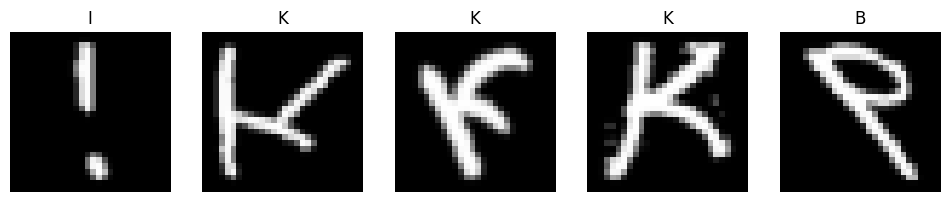

In [26]:
show_samples(X_train, y_train, n=5)

# Initialize the model

In [27]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28,28,1)),
    BatchNormalization(),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(26, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile the model

In [28]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [29]:
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=6,
        restore_best_weights=True
    )
]


In [30]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=callbacks,
    verbose=1
)


Epoch 1/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.6113 - loss: 1.4007 - val_accuracy: 0.0689 - val_loss: 6.8580
Epoch 2/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8802 - loss: 0.3487 - val_accuracy: 0.3527 - val_loss: 2.2557
Epoch 3/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8981 - loss: 0.2854 - val_accuracy: 0.8473 - val_loss: 0.4603
Epoch 4/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9130 - loss: 0.2316 - val_accuracy: 0.9068 - val_loss: 0.2761
Epoch 5/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9330 - loss: 0.1700 - val_accuracy: 0.9155 - val_loss: 0.2527
Epoch 6/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9395 - loss: 0.1597 - val_accuracy: 0.9047 - val_loss: 0.3120
Epoch 7/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9301 - loss: 0.1866 - val_accuracy: 0.9122 - val_loss: 0.2723
Epoch 8/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9460 - loss: 0.1428 - val_accuracy: 

In [31]:
# save final model
model.save('final_emnist_vgg.h5')

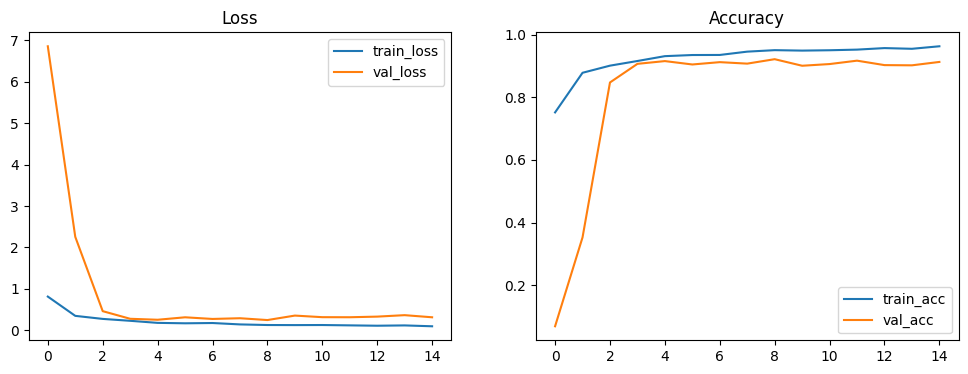

In [32]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Loss')
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.title('Accuracy')
plt.show()

In [33]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print("Final Test Loss:", test_loss)
print("Final Test Accuracy:", test_acc)


2775/2775 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.6737 - loss: 4.8671
Final Test Loss: 4.863442897796631
Final Test Accuracy: 0.67537921667099


2775/2775 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step


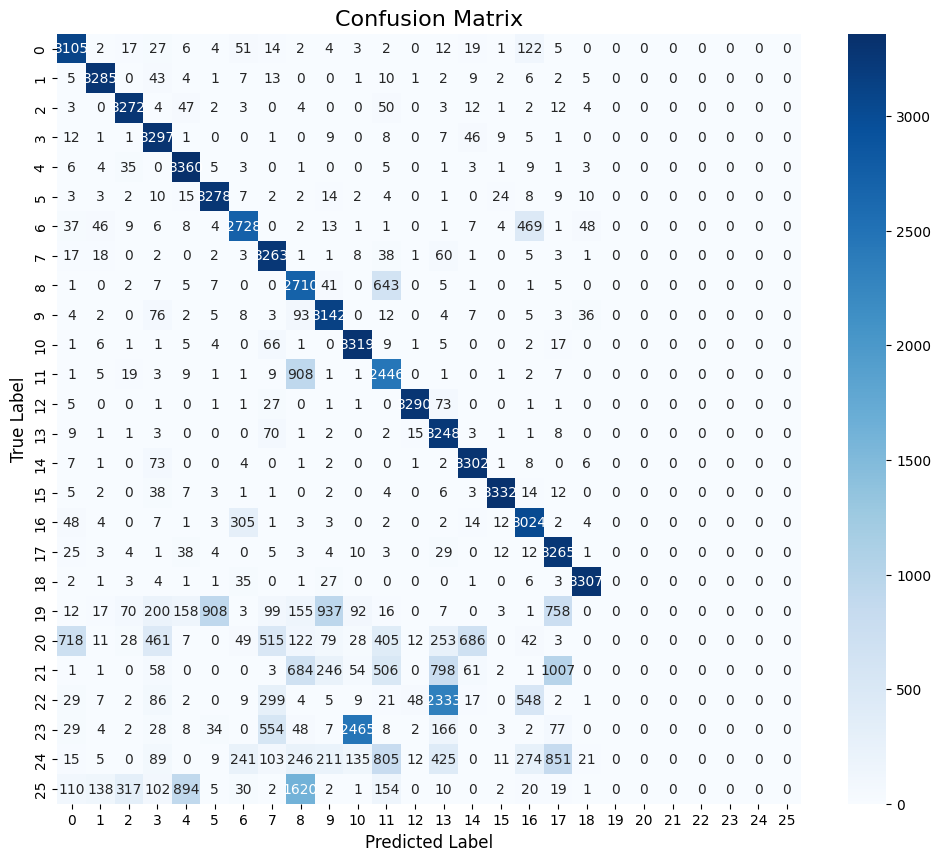

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, cmap="Blues", annot=True, fmt='d', annot_kws={"size": 10})
plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.show()

# Show some misclassified examples

Number of misclassified: 28826


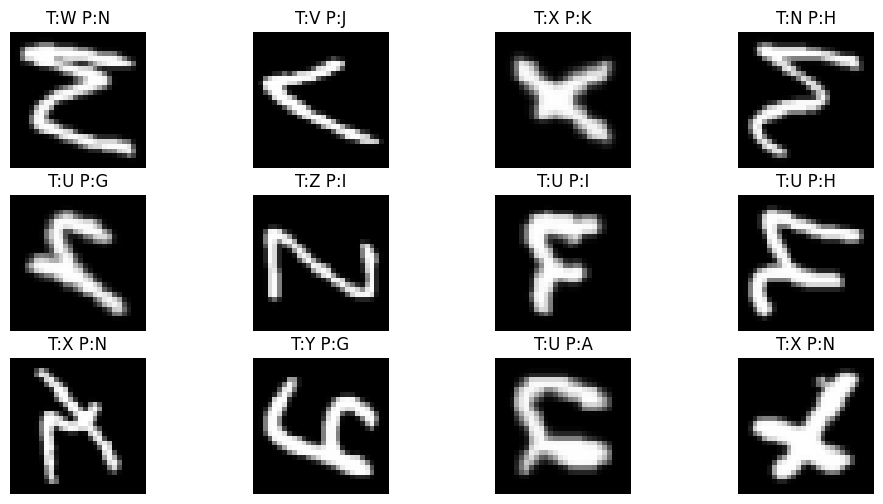

In [35]:
mis_idx = np.where(y_pred != y_true)[0]
print('Number of misclassified:', len(mis_idx))


n_show = min(12, len(mis_idx))
plt.figure(figsize=(12,6))
for i in range(n_show):
    idx = mis_idx[i]
    ax = plt.subplot(3, 4, i+1)
    plt.imshow(X_test[idx].reshape(28, 28).T, cmap='gray')
    # plt.imshow(X_test[idx].squeeze(), cmap='gray')
    plt.title(f'T:{chr(ord("A")+y_true[idx])} P:{chr(ord("A")+y_pred[idx])}')
    plt.axis('off')
plt.show()

# After optimizing some misclassified examples

Total misclassified: 28826


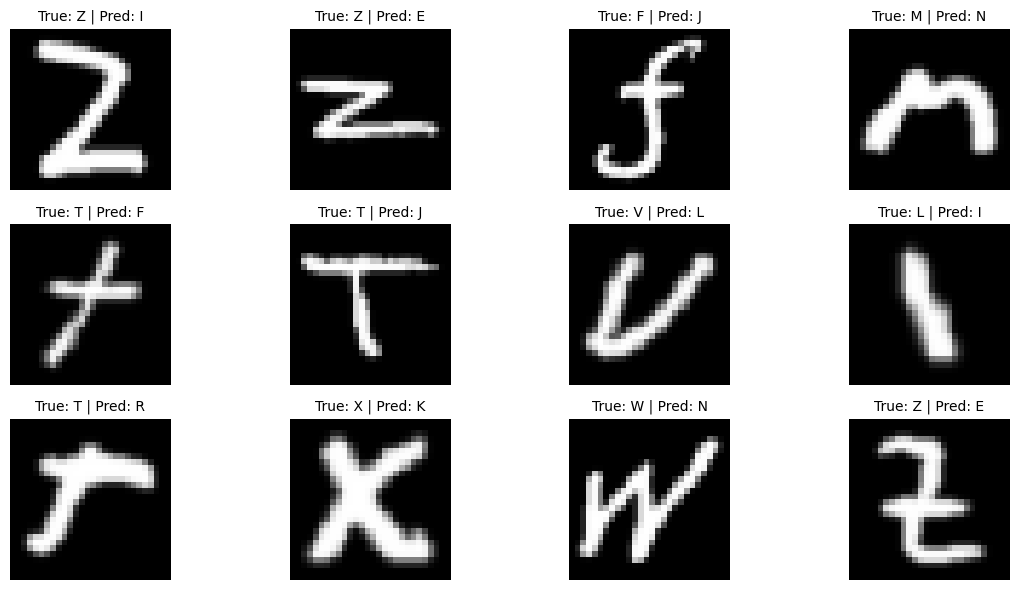

In [36]:
mis_idx = np.where(y_pred != y_true)[0]
np.random.shuffle(mis_idx)

print(f'Total misclassified: {len(mis_idx)}')
n_show = min(12, len(mis_idx))
plt.figure(figsize=(12, 6))
for i in range(n_show):
    idx = mis_idx[i]
    ax = plt.subplot(3, 4, i + 1)
    img = X_test[idx].reshape(28, 28)
    img = np.rot90(img.T, k=1)
    plt.imshow(img, cmap='gray')

    true_char = chr(ord("A") + y_true[idx])
    pred_char = chr(ord("A") + y_pred[idx])

    plt.title(f'True: {true_char} | Pred: {pred_char}', fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

# This indicates that about 5% of EMNIST letters dataset looks like the messy examples above.

#MobileNet

In [37]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models, Input

In [38]:
# Build MobileNet Model

def build_mobilenet_model(input_shape=(28, 28, 1), num_classes=26):
    inputs = Input(shape=input_shape)

    x = layers.Resizing(32, 32)(inputs)

    x = layers.Conv2D(3, (3, 3), padding='same')(x)

    base_model = MobileNetV2(
        include_top=False,
        weights='imagenet',
        input_shape=(32, 32, 3)
    )

    base_model.trainable = True

    x = base_model(x)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.2)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs, name="MobileNet_Custom")
    return model

model = build_mobilenet_model()

/tmp/ipython-input-3242291643.py:10: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [39]:
# Compile & Train

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # Low LR for transfer learning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [40]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True, monitor='val_accuracy'),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=2, monitor='val_loss')
]
print(model.summary())

Model: "MobileNet_Custom"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resizing (Resizing)             │ (None, 32, 32, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 3)      │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 1, 1, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 26)             │        33,306 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,291,320 (8.74 MB)

 Trainable params: 2,257,208 (8.61 MB)

 Non-trainable params: 34,112 (133.25 KB)

None


In [41]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=64,
    callbacks=callbacks
)

Epoch 1/20
209/209 ━━━━━━━━━━━━━━━━━━━━ 113s 245ms/step - accuracy: 0.1575 - loss: 3.2989 - val_accuracy: 0.0655 - val_loss: 3.2912 - learning_rate: 1.0000e-04
Epoch 2/20
209/209 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5127 - loss: 1.6700 - val_accuracy: 0.0588 - val_loss: 3.4015 - learning_rate: 1.0000e-04
Epoch 3/20
209/209 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.6803 - loss: 1.0519 - val_accuracy: 0.1459 - val_loss: 2.9211 - learning_rate: 1.0000e-04
Epoch 4/20
209/209 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.7476 - loss: 0.7824 - val_accuracy: 0.1412 - val_loss: 2.8704 - learning_rate: 1.0000e-04
Epoch 5/20
209/209 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.7937 - loss: 0.6205 - val_accuracy: 0.2020 - val_loss: 2.9281 - learning_rate: 1.0000e-04
Epoch 6/20
209/209 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8281 - loss: 0.5228 - val_accuracy: 0.2953 - val_loss: 2.8885 - learning_rate: 1.0000e-04
Epoch 7/20
209/209 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - 

In [42]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

2775/2775 ━━━━━━━━━━━━━━━━━━━━ 40s 10ms/step - accuracy: 0.6286 - loss: 2.2783
Test accuracy: 0.6287


In [43]:
# from sklearn.metrics import classification_report

# report = classification_report(y_true, y_pred, target_names=class_names)
# print("Classification Report:\n")
# print(report)

NameError: name 'class_names' is not defined

In [44]:
unique_labels, counts = np.unique(y_test_raw, return_counts=True)
print("Unique labels in test set:", unique_labels)
print("Counts of each label:", dict(zip(unique_labels, counts)))

Unique labels in test set: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26]
Counts of each label: {np.int64(1): np.int64(3396), np.int64(2): np.int64(3396), np.int64(3): np.int64(3419), np.int64(4): np.int64(3398), np.int64(5): np.int64(3437), np.int64(6): np.int64(3394), np.int64(7): np.int64(3385), np.int64(8): np.int64(3424), np.int64(9): np.int64(3428), np.int64(10): np.int64(3402), np.int64(11): np.int64(3438), np.int64(12): np.int64(3415), np.int64(13): np.int64(3402), np.int64(14): np.int64(3365), np.int64(15): np.int64(3408), np.int64(16): np.int64(3430), np.int64(17): np.int64(3435), np.int64(18): np.int64(3419), np.int64(19): np.int64(3392), np.int64(20): np.int64(3436), np.int64(21): np.int64(3419), np.int64(22): np.int64(3422), np.int64(23): np.int64(3422), np.int64(24): np.int64(3437), np.int64(25): np.int64(3453), np.int64(26): np.int64(3427)}


Observation:
The test dataset used for evaluation is incomplete. It only contains samples for the first 19 classes (labels 1 to 19, corresponding to letters A through S).

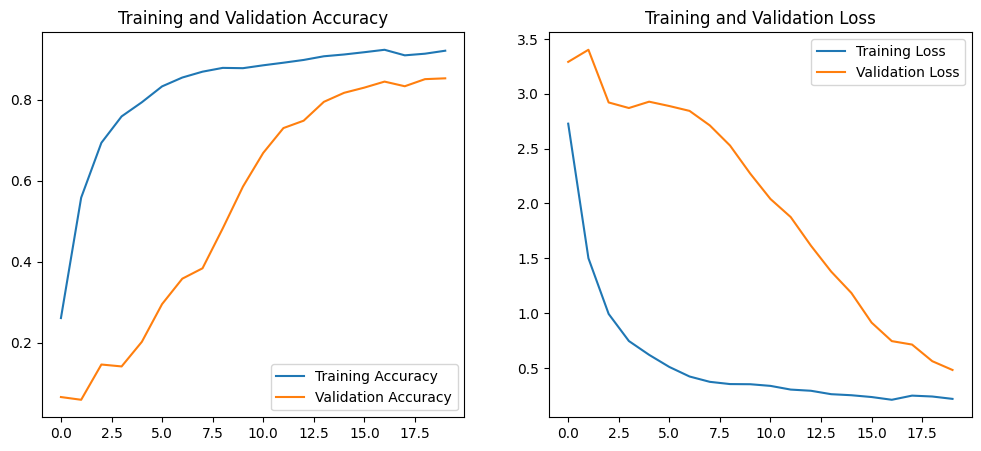

In [45]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

2775/2775 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step


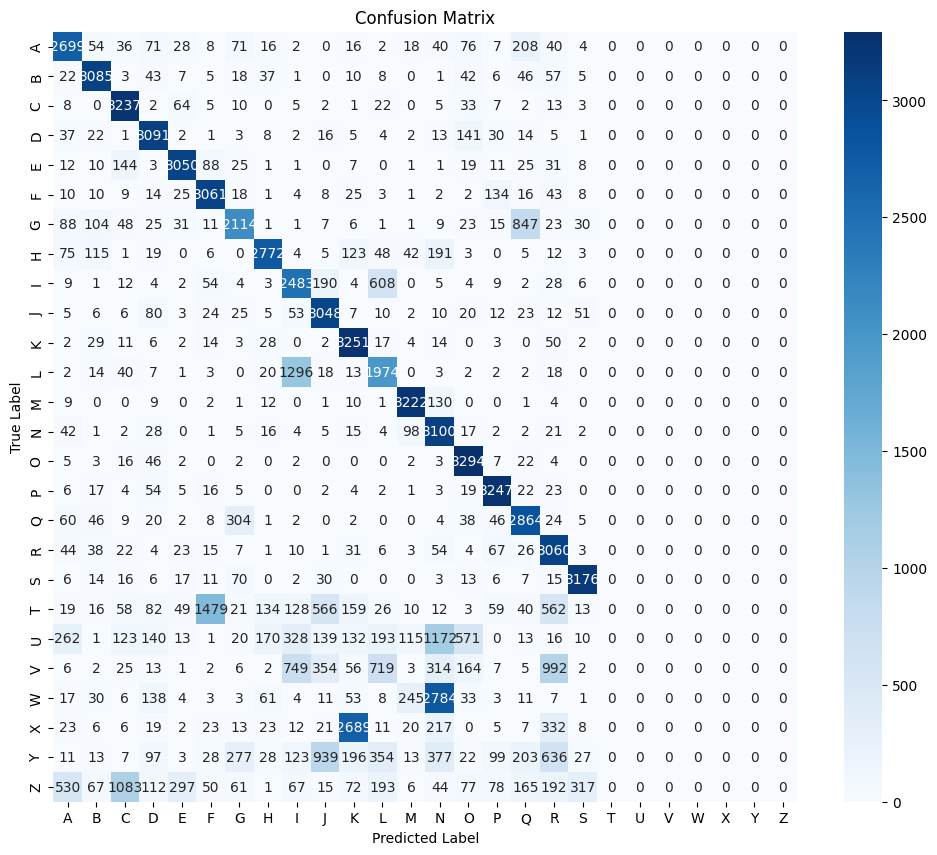

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(12, 10))
class_names = [chr(ord('A') + i) for i in range(26)]
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

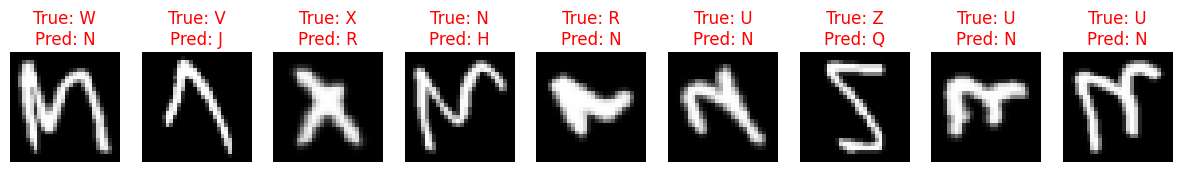

In [47]:
incorrect_indices = np.where(y_pred != y_true)[0]

plt.figure(figsize=(15, 5))
for i, incorrect_idx in enumerate(incorrect_indices[:9]):
    ax = plt.subplot(1, 9, i + 1)
    plt.imshow(X_test[incorrect_idx].squeeze(), cmap='gray')
    true_label = chr(ord('A') + y_true[incorrect_idx])
    pred_label = chr(ord('A') + y_pred[incorrect_idx])
    plt.title(f'True: {true_label}\nPred: {pred_label}', color='red')
    plt.axis('off')
plt.show()

In [48]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range=0.1,
    fill_mode='nearest'
)

datagen.fit(X_train)

In [49]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    validation_data=(X_val, y_val),
    epochs=20,
    callbacks=callbacks
)

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


209/209 ━━━━━━━━━━━━━━━━━━━━ 62s 139ms/step - accuracy: 0.7807 - loss: 0.7071 - val_accuracy: 0.8486 - val_loss: 0.4622 - learning_rate: 5.0000e-05
Epoch 2/20
209/209 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.8118 - loss: 0.5609 - val_accuracy: 0.8574 - val_loss: 0.4115 - learning_rate: 5.0000e-05
Epoch 3/20
209/209 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.8397 - loss: 0.5041 - val_accuracy: 0.8486 - val_loss: 0.4166 - learning_rate: 5.0000e-05
Epoch 4/20
209/209 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.8411 - loss: 0.4750 - val_accuracy: 0.8588 - val_loss: 0.3866 - learning_rate: 5.0000e-05
Epoch 5/20
209/209 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.8502 - loss: 0.4359 - val_accuracy: 0.8709 - val_loss: 0.3864 - learning_rate: 5.0000e-05
Epoch 6/20
209/209 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.8593 - loss: 0.4212 - val_accuracy: 0.8682 - val_loss: 0.3700 - learning_rate: 5.0000e-05
Epoch 7/20
209/209 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - accuracy: 0.

In [50]:
for layer in model.layers[-40:]:
    if hasattr(layer, "trainable"):
        layer.trainable = True

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("\nFine-Tuning started...\n")

history_ft = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32,
    callbacks=callbacks
)


Fine-Tuning started...

Epoch 1/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 89s 83ms/step - accuracy: 0.8924 - loss: 0.3122 - val_accuracy: 0.8905 - val_loss: 0.3047 - learning_rate: 1.0000e-05
Epoch 2/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9019 - loss: 0.2701 - val_accuracy: 0.8946 - val_loss: 0.2872 - learning_rate: 1.0000e-05
Epoch 3/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9031 - loss: 0.2707 - val_accuracy: 0.8959 - val_loss: 0.2802 - learning_rate: 1.0000e-05
Epoch 4/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9059 - loss: 0.2632 - val_accuracy: 0.8959 - val_loss: 0.2849 - learning_rate: 1.0000e-05
Epoch 5/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9081 - loss: 0.2620 - val_accuracy: 0.9007 - val_loss: 0.2780 - learning_rate: 1.0000e-05
Epoch 6/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9057 - loss: 0.2491 - val_accuracy: 0.8980 - val_loss: 0.2848 - learning_rate: 1.0000e-05
Epoch 7/10
417/417 ━━━━━━━━━━━━━

In [51]:
# Data Augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=7,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.1
)

datagen.fit(X_train)

In [52]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    validation_data=(X_val, y_val),
    epochs=20,
    callbacks=callbacks
)

Epoch 1/20
209/209 ━━━━━━━━━━━━━━━━━━━━ 61s 135ms/step - accuracy: 0.9144 - loss: 0.2410 - val_accuracy: 0.9061 - val_loss: 0.2573 - learning_rate: 5.0000e-06
Epoch 2/20
209/209 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - accuracy: 0.9181 - loss: 0.2264 - val_accuracy: 0.9061 - val_loss: 0.2638 - learning_rate: 5.0000e-06
Epoch 3/20
209/209 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.9163 - loss: 0.2306 - val_accuracy: 0.9068 - val_loss: 0.2722 - learning_rate: 5.0000e-06
Epoch 4/20
209/209 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.9193 - loss: 0.2279 - val_accuracy: 0.9027 - val_loss: 0.2771 - learning_rate: 2.5000e-06
Epoch 5/20
209/209 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - accuracy: 0.9156 - loss: 0.2244 - val_accuracy: 0.9007 - val_loss: 0.2822 - learning_rate: 2.5000e-06
Epoch 6/20
209/209 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.9209 - loss: 0.2210 - val_accuracy: 0.9000 - val_loss: 0.2858 - learning_rate: 1.2500e-06
Epoch 7/20
209/209 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step -

# inception

In [53]:
import torch
import torchvision
print("Torch:", torch.__version__)
print("Torchvision:", torchvision.__version__)


Torch: 2.9.0+cu126
Torchvision: 0.24.0+cu126


In [71]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import models, transforms
from PIL import Image

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)


Device: cuda


In [72]:
class EMNISTDataset(Dataset):
    def __init__(self, df, transform=None):
        self.labels = df.iloc[:, 0].values - 1   # letters are 1–26 → convert to 0–25
        self.images = df.iloc[:, 1:].values.astype(np.uint8)
        self.transform = transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        img = self.images[idx].reshape(28, 28)   # grayscale
        img = np.stack([img, img, img], axis=2)  # 3 channels

        img = Image.fromarray(img)

        if self.transform:
            img = self.transform(img)

        label = torch.tensor(self.labels[idx]).long()
        return img, label


In [73]:
train_tf = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.5,0.5,0.5], [0.5,0.5,0.5])
])

test_tf = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5,0.5,0.5], [0.5,0.5,0.5])
])


In [74]:
full_ds = EMNISTDataset(train_data, transform=train_tf)

n_total = len(full_ds)
n_train = int(0.8 * n_total)
n_val   = int(0.1 * n_total)
n_test  = n_total - n_train - n_val

train_ds, val_ds, test_ds = random_split(
    full_ds, [n_train, n_val, n_test],
    generator=torch.Generator().manual_seed(123)
)

val_ds.dataset.transform = test_tf
test_ds.dataset.transform = test_tf

print("Train:", len(train_ds), "Val:", len(val_ds), "Test:", len(test_ds))


Train: 11839 Val: 1479 Test: 1481


In [75]:
batch_size = 64

train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=batch_size, shuffle=False)
test_loader  = DataLoader(test_ds, batch_size=batch_size, shuffle=False)


In [76]:
model = models.googlenet(
    weights=models.GoogLeNet_Weights.IMAGENET1K_V1,
    aux_logits=True
)

num_classes = 26

# main classifier
model.fc = nn.Linear(model.fc.in_features, num_classes)

# auxiliary classifiers
model.aux1.fc2 = nn.Linear(model.aux1.fc2.in_features, num_classes)
model.aux2.fc2 = nn.Linear(model.aux2.fc2.in_features, num_classes)

model = model.to(device)


In [77]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.5, patience=3)

best_acc = 0
best_model_path = "googlenet_emnist_best.pth"
epochs = 10


In [78]:
for epoch in range(epochs):
    model.train()
    running_loss = 0
    correct = 0
    total = 0

    for imgs, labels in train_loader:
        imgs = imgs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs, aux1, aux2 = model(imgs)

        loss = (
            criterion(outputs, labels) +
            0.3 * criterion(aux1, labels) +
            0.3 * criterion(aux2, labels)
        )

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        preds = outputs.argmax(dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    train_acc = correct / total

    # validation
    model.eval()
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for imgs, labels in val_loader:
            imgs = imgs.to(device)
            labels = labels.to(device)

            out = model(imgs)
            preds = out.argmax(dim=1)

            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

    val_acc = val_correct / val_total
    scheduler.step(1 - val_acc)

    print(f"Epoch {epoch+1}: Train Acc={train_acc:.3f}, Val Acc={val_acc:.3f}")

    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(model.state_dict(), best_model_path)
        print("Saved best model!")


Epoch 1: Train Acc=0.745, Val Acc=0.913
Saved best model!
Epoch 2: Train Acc=0.923, Val Acc=0.929
Saved best model!
Epoch 3: Train Acc=0.946, Val Acc=0.934
Saved best model!
Epoch 4: Train Acc=0.961, Val Acc=0.940
Saved best model!
Epoch 5: Train Acc=0.967, Val Acc=0.936
Epoch 6: Train Acc=0.973, Val Acc=0.938
Epoch 7: Train Acc=0.976, Val Acc=0.931
Epoch 8: Train Acc=0.982, Val Acc=0.930
Epoch 9: Train Acc=0.990, Val Acc=0.940
Epoch 10: Train Acc=0.994, Val Acc=0.937


In [79]:
model.load_state_dict(torch.load(best_model_path))
model.eval()

test_correct = 0
test_total = 0

with torch.no_grad():
    for imgs, labels in test_loader:
        imgs = imgs.to(device)
        labels = labels.to(device)

        out = model(imgs)
        preds = out.argmax(dim=1)

        test_correct += (preds == labels).sum().item()
        test_total += labels.size(0)

print("Test Accuracy:", test_correct / test_total)


Test Accuracy: 0.937879810938555


In [ ]:
# # Resize to 224x224x3 for ResNet
# def preprocess_images(X):
#     X = tf.image.resize(X, (224, 224))
#     X = tf.image.grayscale_to_rgb(X)
#     return X

# X_train_prep = preprocess_images(X_train)
# X_val_prep   = preprocess_images(X_val)
# X_test_prep  = preprocess_images(X_test)

# print(X_train_prep.shape, X_val_prep.shape)

In [ ]:
# base_model = ResNet50(
#     weights=None,
#     include_top=False,
#     input_shape=(224, 224, 3)
# )

# model = models.Sequential([
#     base_model,
#     layers.GlobalAveragePooling2D(),
#     layers.Dense(256, activation='relu'),
#     layers.Dropout(0.3),
#     layers.Dense(26, activation='softmax')
# ])

# model.compile(
#     optimizer='adam',
#     loss='categorical_crossentropy',
#     metrics=['accuracy']
# )

# model.summary()

In [ ]:
# history = model.fit(
#     X_train_prep, y_train,
#     validation_data=(X_val_prep, y_val),
#     epochs=10,
#     batch_size=64
# )

In [87]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, Input
import os
import datetime
from tensorflow.keras.applications import ResNet50
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from tensorflow.keras.utils import to_categorical

In [80]:
TRAIN_CSV = 'emnist-letters-train.csv'
TEST_CSV  = 'emnist-letters-test.csv'
BATCH_SIZE = 64
EPOCHS = 10
NUM_CLASSES = 26

In [81]:
def preprocess_images(np_images):
    np_images = np_images.astype('float32').reshape(-1,28,28,1) / 255.0
    return np_images

def labels_to_categorical(labels):
    labels = labels.astype(int) - 1
    return keras.utils.to_categorical(labels, NUM_CLASSES)

def chunk_generator(csv_path, batch_size=BATCH_SIZE):
    reader = pd.read_csv(csv_path, header=None, chunksize=batch_size)
    for chunk in reader:
        labels = chunk.iloc[:,0].values
        images = chunk.iloc[:,1:].values
        yield preprocess_images(images), labels_to_categorical(labels)

In [82]:
def make_dataset(csv_path, batch_size=BATCH_SIZE):
    spec = (tf.TensorSpec([None,28,28,1], tf.float32), tf.TensorSpec([None,26], tf.float32))
    ds = tf.data.Dataset.from_generator(lambda: chunk_generator(csv_path,batch_size), output_signature=spec)
    ds = ds.unbatch().batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return ds

train_ds = make_dataset(TRAIN_CSV)
test_ds  = make_dataset(TEST_CSV)

In [84]:
def conv_block(x,f,strides=1):
    x = layers.Conv2D(f,3,strides=strides,padding='same',use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    return layers.ReLU()(x)

def residual(x,f,down=False):
    s = x
    st = 2 if down else 1
    x = conv_block(x,f,strides=st)
    x = layers.Conv2D(f,3,padding='same',use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    if down or s.shape[-1]!=f:
        s = layers.Conv2D(f,1,strides=st,use_bias=False)(s)
        s = layers.BatchNormalization()(s)
    return layers.ReLU()(layers.add([x,s]))

def build_resnet():
    inp = keras.Input((28,28,1))
    x = conv_block(inp,32)
    x = residual(x,32)
    x = residual(x,64,down=True)
    x = residual(x,128,down=True)
    x = layers.GlobalAvgPool2D()(x)
    x = layers.Dense(26,activation='softmax')(x)
    return keras.Model(inp,x)

model = build_resnet()
model.summary()

NameError: name 'keras' is not defined

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_ds, epochs=EPOCHS, validation_data=test_ds)